In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px         # Plotly is use for graph visulisation
import plotly.graph_objects as go

import yfinance as yf
import datetime
from datetime import date, timedelta

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the dates to fatch the date

today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

print(f"Your data will be {start_date} to {end_date}")

Your data will be 2023-09-30 to 2024-09-29


In [3]:
# Define the Dataset

ticker = "GOOGL"

df = yf.download(ticker, start_date, end_date, progress=False)

In [4]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,131.210007,134.419998,131.169998,134.169998,133.838593,22288000
2023-10-03,133.940002,134.259995,131.839996,132.429993,132.102890,22989400
2023-10-04,132.789993,135.570007,132.529999,135.240005,134.905960,26752300
2023-10-05,135.070007,135.490005,133.449997,135.070007,134.736374,19832600
2023-10-06,134.009995,138.160004,134.009995,137.580002,137.240158,27583200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-10-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,250.0,1.534216e+02,1.725073e+01,1.228800e+02,1.384225e+02,1.511400e+02,1.672325e+02,1.903100e+02
High,250.0,1.549798e+02,1.737808e+01,1.233100e+02,1.394950e+02,1.534100e+02,1.684175e+02,1.917500e+02
Low,250.0,1.520004e+02,1.710257e+01,1.202100e+02,1.370825e+02,1.503100e+02,1.646700e+02,1.890300e+02
Close,250.0,1.535207e+02,1.718564e+01,1.221700e+02,1.384300e+02,1.513100e+02,1.671350e+02,1.911800e+02
Adj Close,250.0,1.532139e+02,1.720659e+01,1.218682e+02,1.380881e+02,1.511229e+02,1.668149e+02,1.909266e+02
Volume,250.0,2.795607e+07,1.085140e+07,1.024210e+07,2.131368e+07,2.514165e+07,3.111932e+07,8.436620e+07


In [7]:
# Set Date columns as a index

df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [8]:
# Plot the Data and see the trends of seasonality
fig= px.line(df, x="Date", y= df.columns, title="Google Stock Price")
fig.show()

In [9]:
# Select The columns

df = df[["Date", "Close"]]

In [10]:
# Plot the Data and see the trends of seasonality
fig= px.line(df, x="Date", y= "Close", title="Google Stock Price")
fig.show()

In [11]:
# Stationarity Check on Data

from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df)
    print(f"ADF Statistic : {result[0]}")
    print(f"P-Values : {result[1]}")
    if result[1] < 0.05:
        print("Reject the null Hypothesis. Data is Stationary")
    else:
        print("Fail to reject the null Hypothesis. Data is not Stationary")
        
check_stationarity(df["Close"])

ADF Statistic : -1.4223801731450285
P-Values : 0.5715010065608315
Fail to reject the null Hypothesis. Data is not Stationary


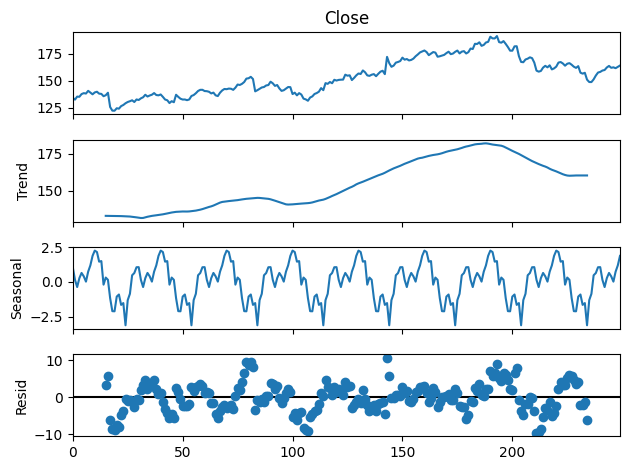

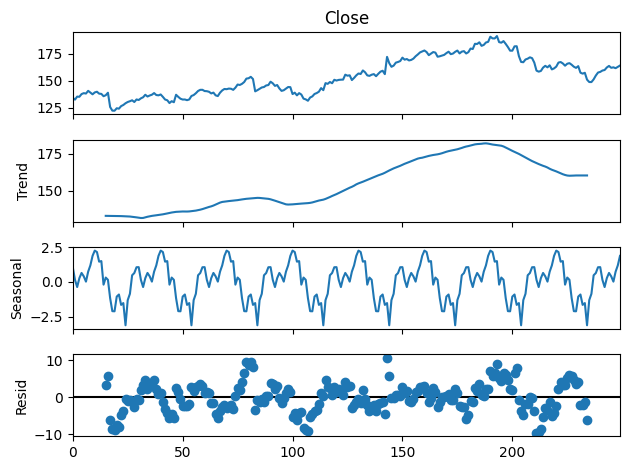

In [12]:
# Decompose the data to see the trend, seasonality and trends

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df["Close"], model="additive", period=30)
decompose.plot()

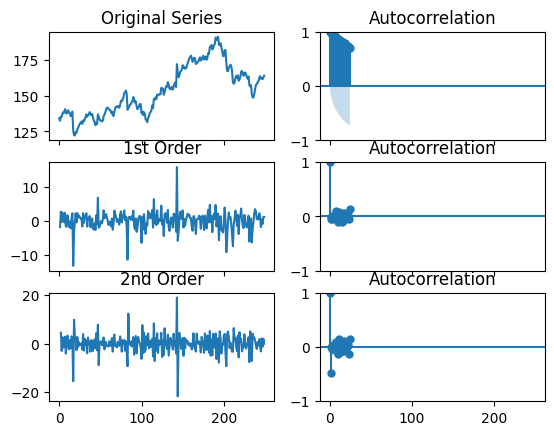

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes =plt.subplots(3,2, sharex = True)
axes[0,0].plot(df["Close"]); axes[0,0].set_title("Original Series")
plot_acf(df["Close"], ax=axes[0,1])

axes[1,0].plot(df["Close"].diff()); axes[1,0].set_title("1st Order")
plot_acf(df["Close"].diff().dropna(), ax=axes[1,1])

axes[2,0].plot(df["Close"].diff().diff()); axes[2,0].set_title("2nd Order")
plot_acf(df["Close"].diff().diff().dropna(), ax=axes[2,1])

plt.show()

d =2

#### Lets Find P Value

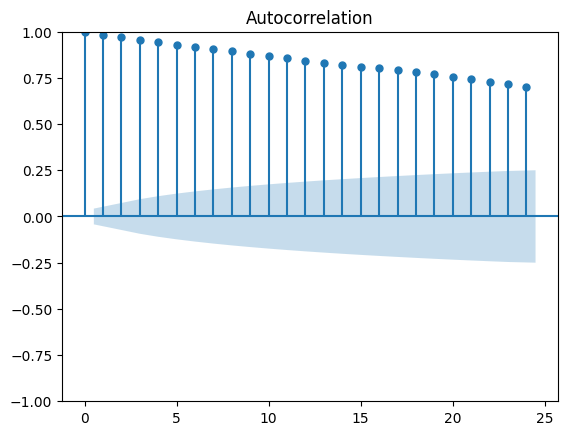

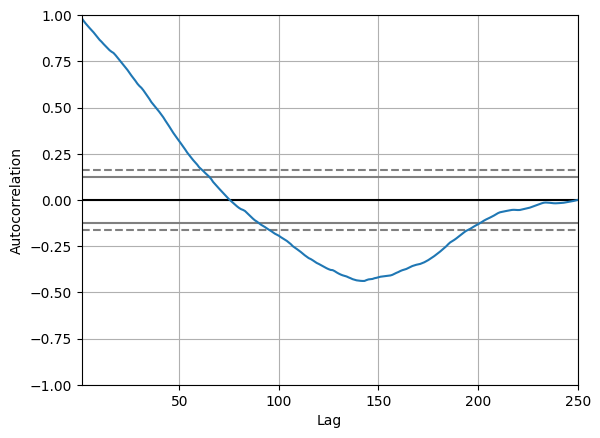

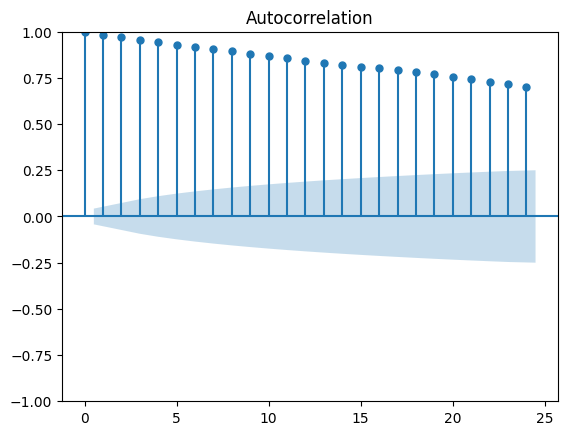

In [14]:
# Plots

pd.plotting.autocorrelation_plot(df["Close"])
plot_acf(df["Close"], alpha=0.5)

P = 2

#### Lets Find q Value

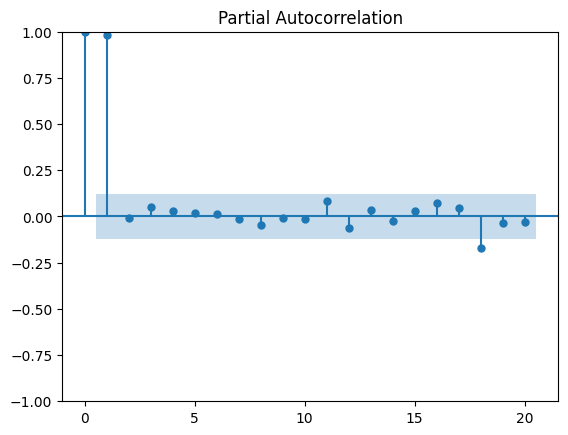

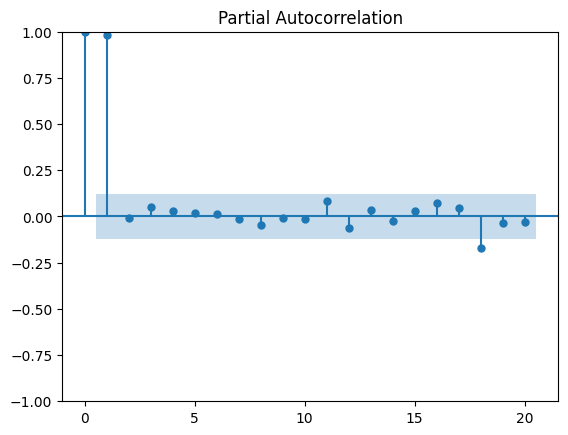

In [15]:
plot_pacf(df["Close"], lags=20, alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -600.564
Date:                Sun, 29 Sep 2024   AIC                           1207.129
Time:                        12:37:47   BIC                           1217.681
Sample:                             0   HQIC                          1211.376
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6879      0.802      0.857      0.391      -0.885       2.261
ma.L1         -0.7175      0.773     -0.928      0.353      -2.233       0.798
sigma2         7.2858      0.311     23.396      0.0

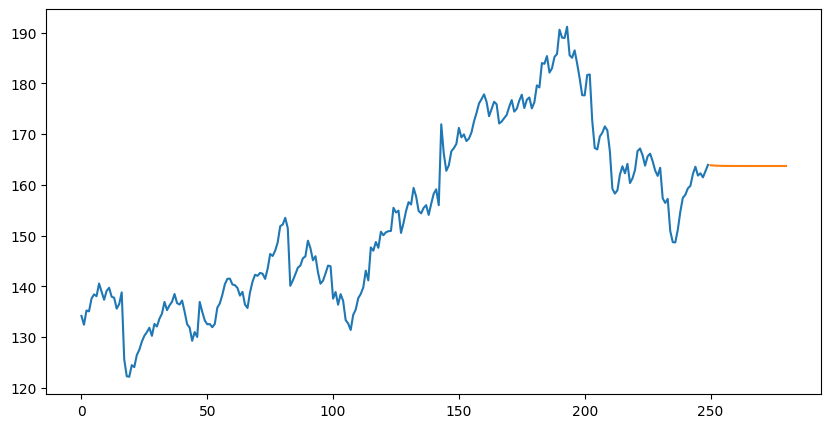

In [16]:
# lets Define P, d, q:

p, d, q = 1, 1, 1

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["Close"], order=(p, d, q))
model = model.fit()
print(model.summary())

# Predict Next 30 Days
forecast = model.predict(len(df["Close"]), len(df["Close"])+30)
print(forecast)

# PLot Forecasst
plt.figure(figsize=(10,5))
plt.plot(df["Close"], label = "Actual")
plt.plot(forecast, label = "Forecast")

In [17]:
# Lets Run SARIMA
import statsmodels.api as sm

p, d, q = 1,1,1
model = sm.tsa.statespace.SARIMAX(df["Close"], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -592.234
Date:                            Sun, 29 Sep 2024   AIC                           1194.469
Time:                                    12:37:50   BIC                           1211.809
Sample:                                         0   HQIC                          1201.458
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5661     60.123     -0.009      0.992    -118.405     117.273
ma.L1          0.5653     60.147   

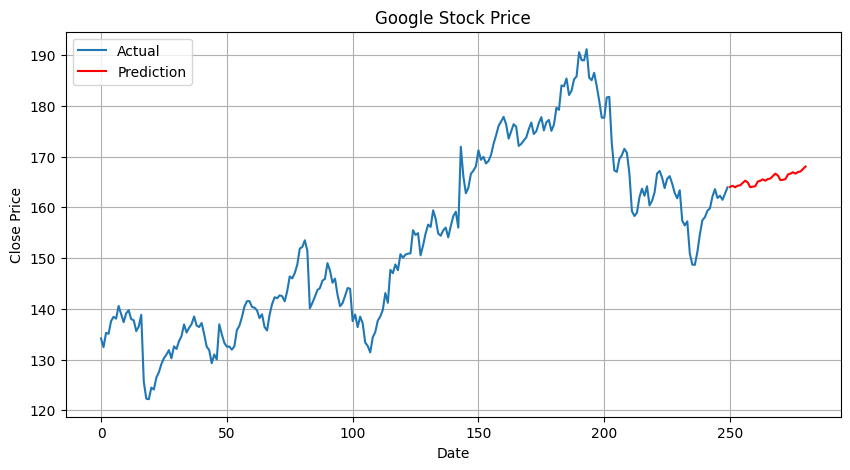

In [18]:
predictions = model.predict(start = len(df["Close"]), end = len(df["Close"])+30)

# Plot the Predictions
plt.figure(figsize=(10,5))
plt.plot(df["Close"], label = "Actual")
plt.plot(predictions, color ="r", label = "Prediction")

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Google Stock Price")
plt.legend(loc="upper left")
plt.grid()
plt.show()

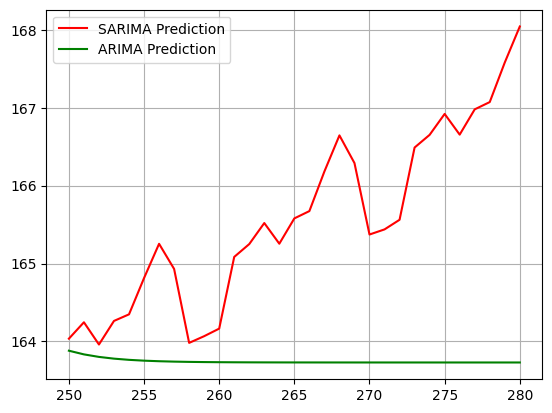

In [19]:
# Difference Between ARIMA and SARIMA
plt.plot(range(len(df["Close"]), len(df["Close"])+len(predictions)), predictions, label="SARIMA Prediction", color="red")
plt.plot(range(len(df["Close"]), len(df["Close"])+len(forecast)), forecast, label="ARIMA Prediction", color="green")
plt.legend(loc="upper left")
plt.grid()
plt.show()
